In [12]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.sparse.linalg import inv
from scipy.sparse import csc_matrix
from BCG_lib import BCG, conjugate_grad, ichol
%matplotlib inline

In [2]:
A_csc = loadmat('sparse_matrix.mat')['spmat']
L = ichol(A_csc.toarray())
L = csc_matrix(L)
P = L.dot(L.T)
print(np.linalg.norm(P.toarray()-A_csc.toarray()))

5.27075007834948


# Choose preconditioner

In [3]:
invP = inv(P).toarray()
invA = inv(A_csc).toarray()
eye_mat = np.eye(100)

# Trace Error

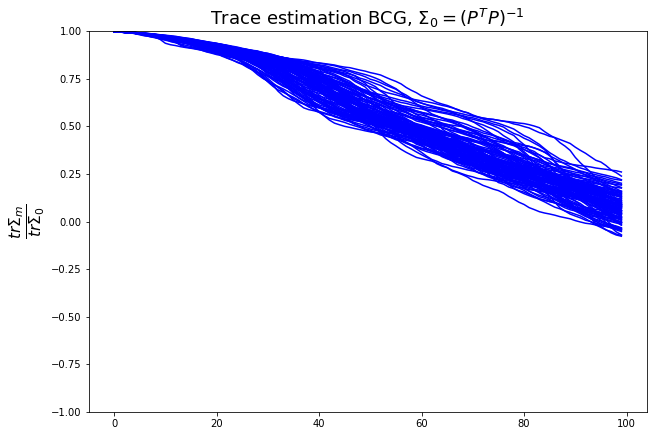

In [4]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invP, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    plt.plot(trace_est, color='blue')
    plt.title(r'Trace estimation BCG, $\Sigma_0 = (P^{T}P)^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
    
plt.ylim([-1, 1]);

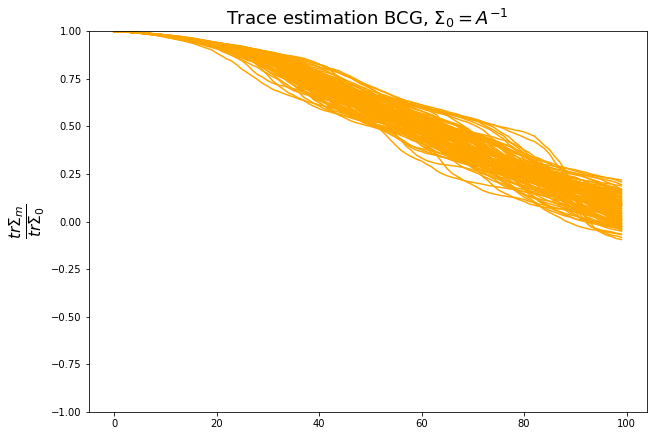

In [5]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invA, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    plt.plot(trace_est, color='orange')
    plt.title(r'Trace estimation BCG, $\Sigma_0 = A^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
    
plt.ylim([-1, 1]);

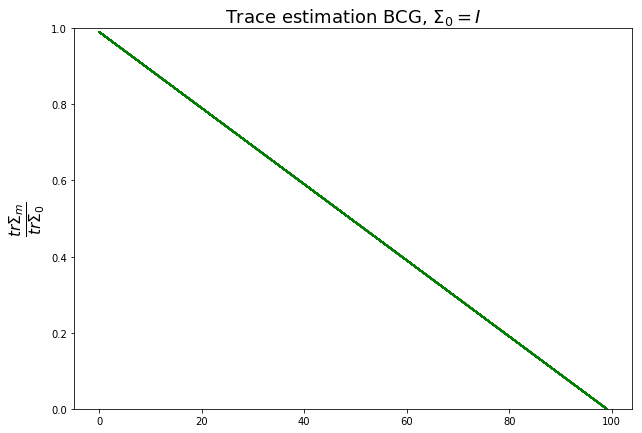

In [6]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), eye_mat, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    plt.plot(trace_est, color='green')
    plt.title(r'Trace estimation BCG, $\Sigma_0 = I$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
    
plt.ylim([0, 1]);

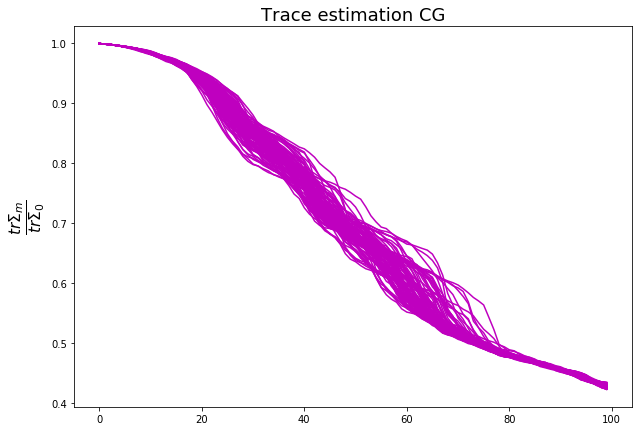

In [7]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    _, _, tr_err = conjugate_grad(A_csc.toarray(), b, 100, x)
    
    plt.plot(tr_err, color='m')
    plt.title(r'Trace estimation CG', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);

# Point estimation

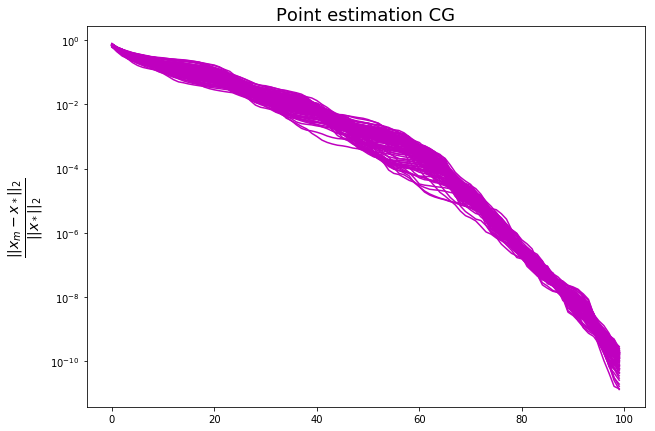

In [8]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    _, rel_err, _ = conjugate_grad(A_csc.toarray(), b, 100, x)
    
    plt.semilogy(rel_err, color='m')
    plt.title(r'Point estimation CG', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20);

C:\Users\Andrey\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


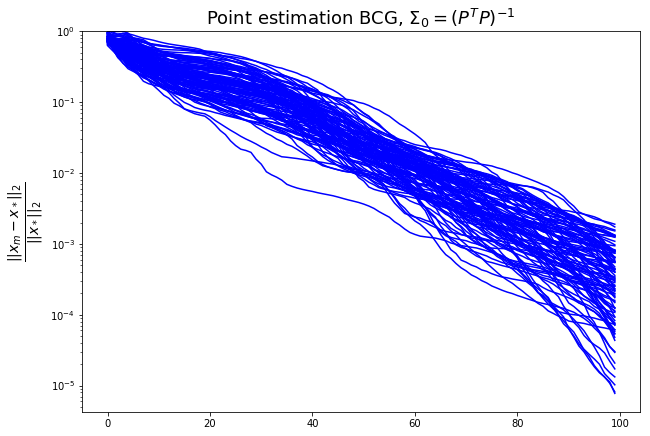

In [9]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invP, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    plt.semilogy(point_est, color='blue')
    plt.title(r'Point estimation BCG, $\Sigma_0 = (P^{T}P)^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20)
plt.ylim([10^(-6), 1]);

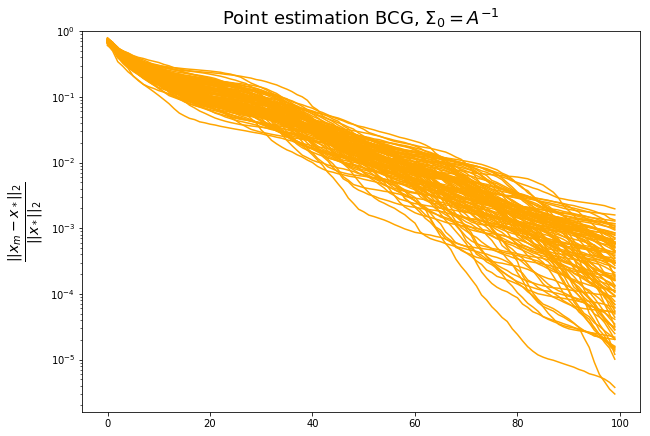

In [10]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invA, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    plt.semilogy(point_est, color='orange')
    plt.title(r'Point estimation BCG, $\Sigma_0 = A^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20)
plt.ylim([10^(-6), 1]);

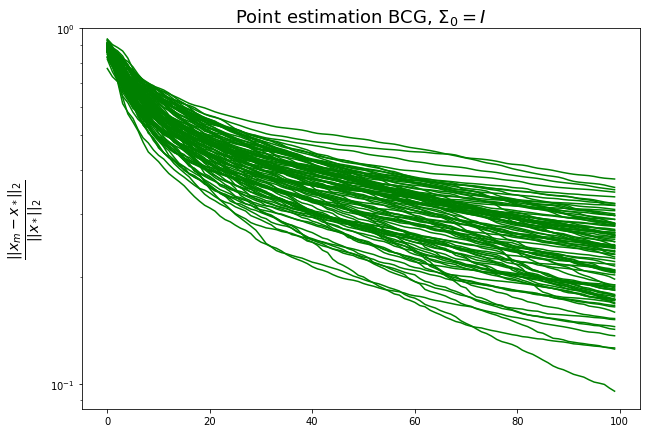

In [11]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), eye_mat, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    plt.semilogy(point_est, color='green')
    plt.title(r'Point estimation BCG, $\Sigma_0 = I$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20);
plt.ylim([10^(-6), 1]);